### Criação de ficheiro Excel a partir de SQL Server com possibilidade de edição
#### Jorge Gomes, 2023-12-17

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd 
import pyodbc
import sys
from datetime import datetime, timedelta

server = '10.20.30.40'
database = 'DBteste'
uid = 'xxx'
pwd = 'yyy'

conn = pyodbc.connect(f'Driver={{SQL Server}};Server={server};Database={database};UID={uid};PWD={pwd}')

In [46]:
input_query = """
    select * from [dbo].[ExcelCreation]
"""

In [47]:
input_query_df = pd.read_sql_query(input_query,conn)
input_query_df

,id,ZONA,NLOJA,NOMELOJA,FECHA,TAXAIVA,VALORBASE,IVA,VALORFINAL
0,19,PAREDES,1,ALVRE,2023-12-17,21%,-99.17,-20.83,-120.0
1,19,PAREDES,1,ALVRE,2023-12-17,21%,-53.72,-11.28,-65.0
2,19,PAREDES,1,ALVRE,2023-12-17,21%,-41.32,-8.68,-50.0
3,19,PAREDES,1,ALVRE,2023-12-17,21%,-99.17,-20.83,-120.0
4,19,PAREDES,2,AGUIAR,2023-12-17,21%,-66.12,-13.88,-80.0
5,19,PAREDES,2,AGUIAR,2023-12-17,21%,-99.18,-20.82,-120.0
6,19,PAREDES,2,AGUIAR,2023-12-17,21%,-45.45,-9.55,-55.0
7,19,PAREDES,2,AGUIAR,2023-12-17,21%,57.85,12.15,70.0
8,19,PAREDES,3,RECAREI,2023-12-17,21%,-99.42,-20.88,-120.3
9,19,PAREDES,3,RECAREI,2023-12-17,21%,-37.19,-7.81,-45.0


In [49]:
#Transformações ao Dataset. Como exemplo: alterar formato da data de yyyy-mm-dd para dd/mm/yyyy
input_query_df["FECHA"] = pd.to_datetime(input_query_df["FECHA"])
input_query_df["FECHA"] = input_query_df["FECHA"].dt.strftime("%d/%m/%Y")
input_query_df

,id,ZONA,NLOJA,NOMELOJA,FECHA,TAXAIVA,VALORBASE,IVA,VALORFINAL
0,19,PAREDES,1,ALVRE,17/12/2023,21%,-99.17,-20.83,-120.0
1,19,PAREDES,1,ALVRE,17/12/2023,21%,-53.72,-11.28,-65.0
2,19,PAREDES,1,ALVRE,17/12/2023,21%,-41.32,-8.68,-50.0
3,19,PAREDES,1,ALVRE,17/12/2023,21%,-99.17,-20.83,-120.0
4,19,PAREDES,2,AGUIAR,17/12/2023,21%,-66.12,-13.88,-80.0
5,19,PAREDES,2,AGUIAR,17/12/2023,21%,-99.18,-20.82,-120.0
6,19,PAREDES,2,AGUIAR,17/12/2023,21%,-45.45,-9.55,-55.0
7,19,PAREDES,2,AGUIAR,17/12/2023,21%,57.85,12.15,70.0
8,19,PAREDES,3,RECAREI,17/12/2023,21%,-99.42,-20.88,-120.3
9,19,PAREDES,3,RECAREI,17/12/2023,21%,-37.19,-7.81,-45.0


In [50]:
# data de hoje menos um dia
data_ontem = datetime.today().date() - timedelta(days=1)
ano = data_ontem.year
mes = data_ontem.month
dia = data_ontem.day

# Caminho e Nome do arquivo excel - manter sempre 2 digitos no dia e mes, colocando o zero à esquerda
nome = f'C:\\FICHEIROS\\CriacaoExcel_{ano}_{mes:02d}_{dia:02d}'
nome

'C:\\FICHEIROS\\CriacaoExcel_2023_12_17'

### Criação de ficheiro Excel v1 com utilização da função "to_excel", o cabeçalho fica com borders

In [51]:
#output directo para excel
#primeira linha com o nome das colunas tem borders
input_query_df.to_excel(nome + '_v1.xlsx', index=False, startrow=1)

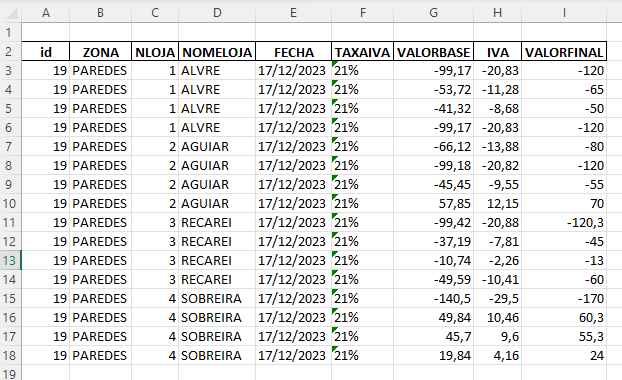

### Criação de ficheiro Excel v2 com possibilidade de edição com utilização da classe "ExcelWriter". O cabeçalho fica sem borders com utilização da Transposta

In [52]:
writer = pd.ExcelWriter( nome + '_v2.xlsx', engine='xlsxwriter')

#retirar borders dos cabeçalhos - usar a partir da segunda linha
input_query_df.T.reset_index().T.to_excel(writer, sheet_name='Sheet1', header=False, index=False, startrow=1)

#para usar na escrita da data no fim dos dados
(max_row, max_col) = input_query_df.shape

worksheet = writer.sheets['Sheet1']

#primeira linha do ficheiro
worksheet.write(0, 0, "Resumo de vendas nas lojas de Paredes")

#ultimas linha do ficheiro
worksheet.write(max_row + 3, 0, pd.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
worksheet.write(max_row + 3, 2, 'RES_VEN_MERCADO_PAREDES')
worksheet.write(max_row + 4, 0, 'PK Version 1.2.1234')

writer.close()

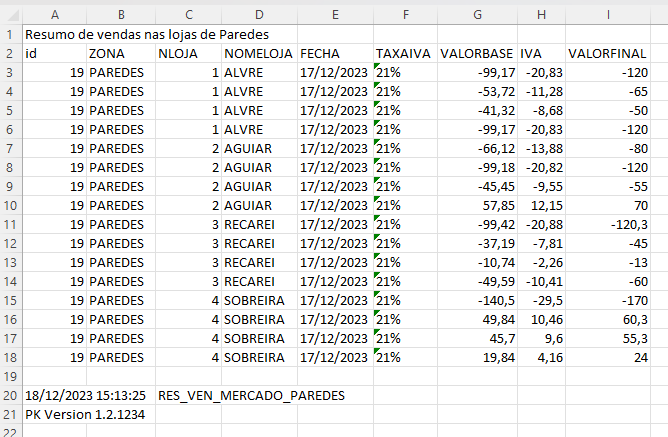

### Clarificação
#### Utilização da Transposta para eliminar os borders do cabeçalho - na realidade, deixa de se utilizar o cabeçalho

In [53]:
#Dataframe inicial
input_query_df

,id,ZONA,NLOJA,NOMELOJA,FECHA,TAXAIVA,VALORBASE,IVA,VALORFINAL
0,19,PAREDES,1,ALVRE,17/12/2023,21%,-99.17,-20.83,-120.0
1,19,PAREDES,1,ALVRE,17/12/2023,21%,-53.72,-11.28,-65.0
2,19,PAREDES,1,ALVRE,17/12/2023,21%,-41.32,-8.68,-50.0
3,19,PAREDES,1,ALVRE,17/12/2023,21%,-99.17,-20.83,-120.0
4,19,PAREDES,2,AGUIAR,17/12/2023,21%,-66.12,-13.88,-80.0
5,19,PAREDES,2,AGUIAR,17/12/2023,21%,-99.18,-20.82,-120.0
6,19,PAREDES,2,AGUIAR,17/12/2023,21%,-45.45,-9.55,-55.0
7,19,PAREDES,2,AGUIAR,17/12/2023,21%,57.85,12.15,70.0
8,19,PAREDES,3,RECAREI,17/12/2023,21%,-99.42,-20.88,-120.3
9,19,PAREDES,3,RECAREI,17/12/2023,21%,-37.19,-7.81,-45.0


In [54]:
#Transposta
input_query_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
id,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
ZONA,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES
NLOJA,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4
NOMELOJA,ALVRE,ALVRE,ALVRE,ALVRE,AGUIAR,AGUIAR,AGUIAR,AGUIAR,RECAREI,RECAREI,RECAREI,RECAREI,SOBREIRA,SOBREIRA,SOBREIRA,SOBREIRA
FECHA,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023
TAXAIVA,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%
VALORBASE,-99.17,-53.72,-41.32,-99.17,-66.12,-99.18,-45.45,57.85,-99.42,-37.19,-10.74,-49.59,-140.5,49.84,45.7,19.84
IVA,-20.83,-11.28,-8.68,-20.83,-13.88,-20.82,-9.55,12.15,-20.88,-7.81,-2.26,-10.41,-29.5,10.46,9.6,4.16
VALORFINAL,-120.0,-65.0,-50.0,-120.0,-80.0,-120.0,-55.0,70.0,-120.3,-45.0,-13.0,-60.0,-170.0,60.3,55.3,24.0


In [55]:
#o reset_index() cria nova coluna com o index
input_query_df.T.reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,id,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
1,ZONA,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES,PAREDES
2,NLOJA,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4
3,NOMELOJA,ALVRE,ALVRE,ALVRE,ALVRE,AGUIAR,AGUIAR,AGUIAR,AGUIAR,RECAREI,RECAREI,RECAREI,RECAREI,SOBREIRA,SOBREIRA,SOBREIRA,SOBREIRA
4,FECHA,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023,17/12/2023
5,TAXAIVA,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%,21%
6,VALORBASE,-99.17,-53.72,-41.32,-99.17,-66.12,-99.18,-45.45,57.85,-99.42,-37.19,-10.74,-49.59,-140.5,49.84,45.7,19.84
7,IVA,-20.83,-11.28,-8.68,-20.83,-13.88,-20.82,-9.55,12.15,-20.88,-7.81,-2.26,-10.41,-29.5,10.46,9.6,4.16
8,VALORFINAL,-120.0,-65.0,-50.0,-120.0,-80.0,-120.0,-55.0,70.0,-120.3,-45.0,-13.0,-60.0,-170.0,60.3,55.3,24.0


In [56]:
#Transposta 
#colocar no excel com as seguintes opções: header=False, index=False
input_query_df.T.reset_index().T

,0,1,2,3,4,5,6,7,8
index,id,ZONA,NLOJA,NOMELOJA,FECHA,TAXAIVA,VALORBASE,IVA,VALORFINAL
0,19,PAREDES,1,ALVRE,17/12/2023,21%,-99.17,-20.83,-120.0
1,19,PAREDES,1,ALVRE,17/12/2023,21%,-53.72,-11.28,-65.0
2,19,PAREDES,1,ALVRE,17/12/2023,21%,-41.32,-8.68,-50.0
3,19,PAREDES,1,ALVRE,17/12/2023,21%,-99.17,-20.83,-120.0
4,19,PAREDES,2,AGUIAR,17/12/2023,21%,-66.12,-13.88,-80.0
5,19,PAREDES,2,AGUIAR,17/12/2023,21%,-99.18,-20.82,-120.0
6,19,PAREDES,2,AGUIAR,17/12/2023,21%,-45.45,-9.55,-55.0
7,19,PAREDES,2,AGUIAR,17/12/2023,21%,57.85,12.15,70.0
8,19,PAREDES,3,RECAREI,17/12/2023,21%,-99.42,-20.88,-120.3
